C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18488\1958446101.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=concentracao_Bairro.values, y=concentracao_Bairro.index, palette='viridis')


Gráficos gerados com sucesso.


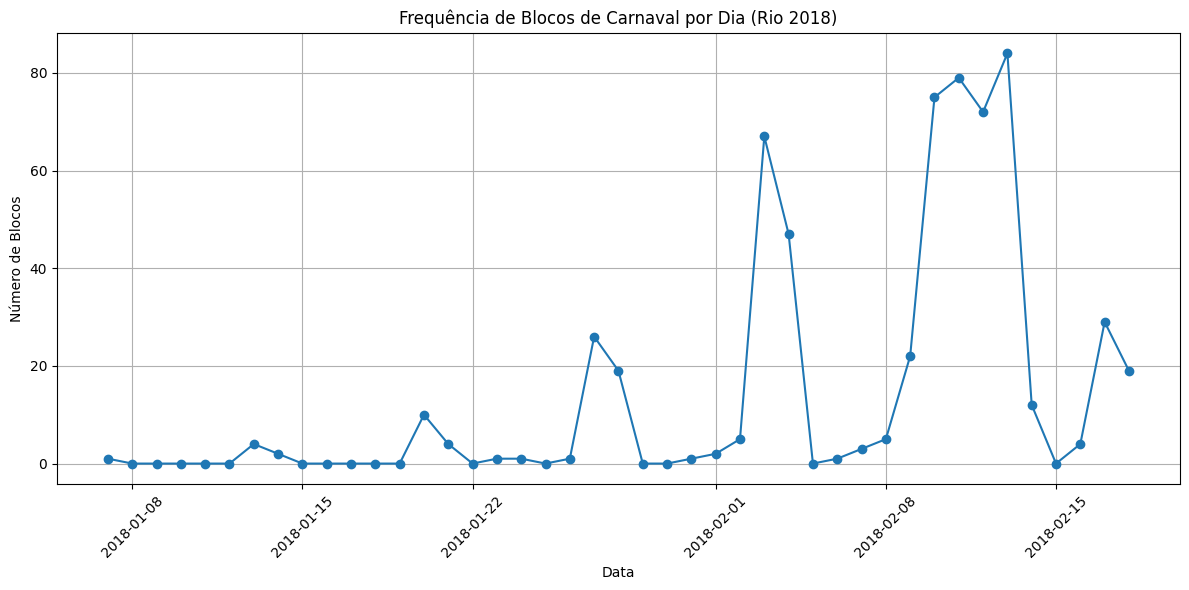

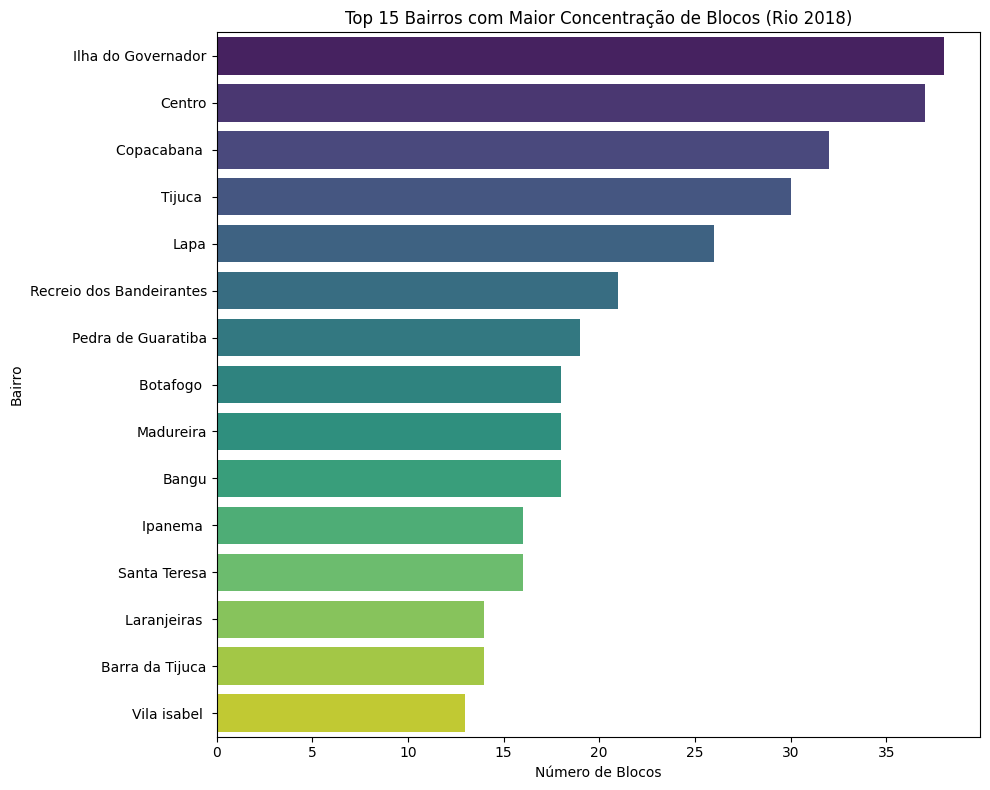

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

dados_Blocos = pd.read_csv("Carnaval 2018.csv", sep=';') #Quebrando por causa da vírgula na linha 6;

#Organização de Data/Hora
concentracao_Horario = dados_Blocos['Data'] + ' ' + dados_Blocos['Concentração']
desfile_Horario = dados_Blocos['Data'] + ' ' + dados_Blocos['Desfile']
final_Horario = dados_Blocos['Data'] + ' ' + dados_Blocos['Final']

format_string = '%d/%m/%Y %H:%M:%S'

dados_Blocos['horario_concentracao'] = pd.to_datetime(concentracao_Horario, format=format_string, errors='coerce')
dados_Blocos['horario_desfile'] = pd.to_datetime(desfile_Horario, format=format_string, errors='coerce')
dados_Blocos['horario_final'] = pd.to_datetime(final_Horario, format=format_string, errors='coerce')

#Filtro
dados_Blocos.dropna(subset=['horario_desfile'], inplace=True)
frequencia_dia = dados_Blocos.set_index('horario_desfile').groupby(pd.Grouper(freq='D')).size()

#Gráfico 1
plt.figure(figsize=(12, 6))
plt.plot(frequencia_dia.index, frequencia_dia.values, marker='o', linestyle='-')
plt.title("Frequência de Blocos de Carnaval por Dia (Rio 2018)")
plt.xlabel("Data")
plt.ylabel("Número de Blocos")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("frequencia_por_dia.png")


#Gráfico 2
concentracao_Bairro = dados_Blocos['Bairro'].value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=concentracao_Bairro.values, y=concentracao_Bairro.index, palette='viridis')
plt.title("Top 15 Bairros com Maior Concentração de Blocos (Rio 2018)")
plt.xlabel("Número de Blocos")
plt.ylabel("Bairro")
plt.tight_layout()
plt.savefig("concentracao_por_bairro.png")

print("Gráficos gerados com sucesso.")
